# COVID-19 USA

## Objetivos deste notebook

Adaptar o [notebook](https://raw.githubusercontent.com/jgrocha/covid-pt/master/Casos%20de%20estudo/COVID-19_USA_statistics/COVID-19_USA_statistics.ipynb) criado por Tiago Pinheiro - A82491 de forma a utilizar dados mais atualizados.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

Start Qgis with GUI and start a project

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\\OSGeo4W64\\apps\\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/Acer/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/Acer/AppData/Roaming/python3\profiles\default/qgis-auth.db



Download Map

In [3]:
import urllib.request
url = 'https://www2.census.gov/geo/tiger/TIGER2017//STATE/tl_2017_us_state.zip'
filename = '../../tmp/tl_2017_us_state.zip'
urllib.request.urlretrieve(url, filename)

('../../tmp/tl_2017_us_state.zip', <http.client.HTTPMessage at 0x21d70d26908>)

Unzip Map

In [4]:
import zipfile
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('../../tmp')

Load map layer

In [5]:
path = "../../tmp/tl_2017_us_state.shp"
map_layer = QgsVectorLayer(path, 'USA map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


Download updated CSV file

In [6]:
import datetime
from datetime import date

today = date.today()
today = today.strftime("%m/%d/%Y")
print("Today's date:", today)

safe_date = date.today()-datetime.timedelta(2)
safe = safe_date.strftime("%m-%d-%Y")
print("Safe date:", safe)

path = "../../tmp/{}.csv".format(safe)
print(path)


import urllib.request
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{}.csv'.format(safe)
filename = '../../tmp/{}.csv'.format(safe)
urllib.request.urlretrieve(url, filename)

Today's date: 05/28/2020
Safe date: 05-26-2020
../../tmp/05-26-2020.csv


('../../tmp/05-26-2020.csv', <http.client.HTTPMessage at 0x21d72d4a1d0>)

Load CSV file

In [9]:
csv_path = "file:../../tmp/{}.csv?delimiter=(',')".format(safe)
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


Join layer

In [10]:
joinName = 'Province_State'
targetName = 'NAME'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

## Gráfico do número de mortes, casos confirmados e casos recuperados

In [11]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME']:
        state = feature['NAME']
        if feature['Data_Deaths']:
            death = feature['Data_Deaths']
        else:
            death = 0
        if feature['Data_Confirmed']:
            confirmed = feature['Data_Confirmed']
        else:
            confirmed = 0
        if feature['Data_Recovered']:
            recovered = feature['Data_Recovered']
        else:
            recovered = 0
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered }
    dict.append(e)

In [12]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]

### Top 5 Casos Confirmados

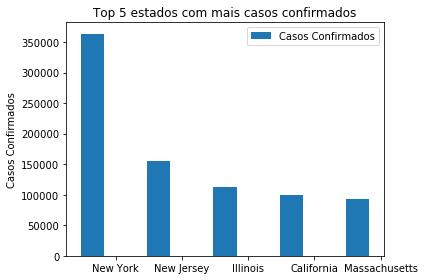

In [13]:
delta1 = [top5confirmed[0]['Confirmed'],top5confirmed[1]['Confirmed'],top5confirmed[2]['Confirmed'],top5confirmed[3]['Confirmed'],top5confirmed[4]['Confirmed']]
states = [top5confirmed[0]['Name'],top5confirmed[1]['Name'],top5confirmed[2]['Name'],top5confirmed[3]['Name'],top5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados')

plt.ylabel('Casos Confirmados')
plt.title('Top 5 estados com mais casos confirmados')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bottom 5 Casos Confirmados

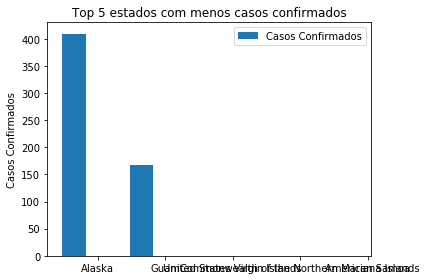

In [14]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados')

plt.ylabel('Casos Confirmados')
plt.title('Top 5 estados com menos casos confirmados')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Mortes

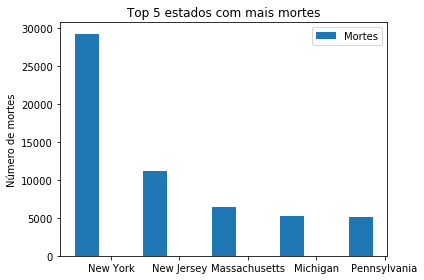

In [15]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Mortes')

plt.ylabel('Número de mortes')
plt.title('Top 5 estados com mais mortes')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bottom 5 Mortes

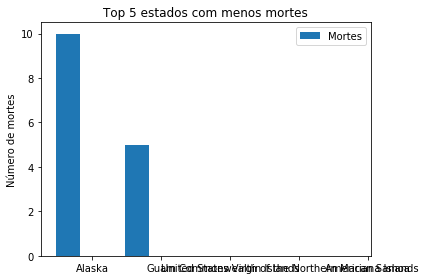

In [16]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Mortes')

plt.ylabel('Número de mortes')
plt.title('Top 5 estados com menos mortes')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Casos Recuperados

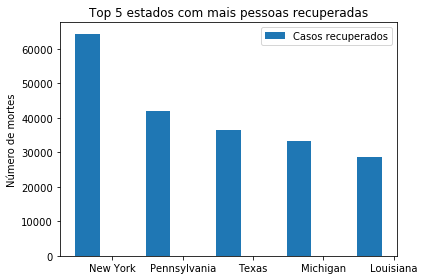

In [17]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos recuperados')

plt.ylabel('Número de mortes')
plt.title('Top 5 estados com mais pessoas recuperadas')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

## Active cases

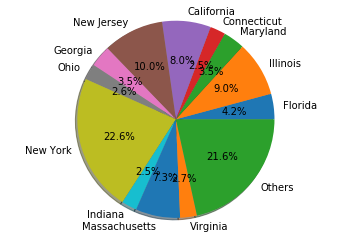

In [18]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_Active']:
        total += feature['Data_Active']

for feature in map_layer.getFeatures():
    if feature['Data_Active']:
        if (feature['Data_Active']/total) > 0.025:
            values.append(feature['Data_Active'])
            labels.append(feature['NAME'])
        else:
            lowerTotal += feature['Data_Active']

values.append(lowerTotal)
labels.append("Others")

plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Taxa de Mortalidade

Criar uma nova camada para imprimir a taxa de mortalidade

In [19]:
death_layer = map_layer.clone()
death_layer.setName("Death rate")

Eliminar o Alaska, o Hawaii, a Commonwealth of the Northern Mariana Islands, Guam e American Samoa.

In [20]:
delete = []

for feature in death_layer.getFeatures():
    if feature['NAME']=="Alaska" or feature['NAME']=="Hawaii" or feature['NAME']=="Commonwealth of the Northern Mariana Islands" or feature['NAME']=="Guam" or feature['NAME']=="American Samoa": 
        delete.append(feature.id())

res = death_layer.dataProvider().deleteFeatures(delete)

In [21]:

from qgis.utils import iface


label_settings = QgsPalLayerSettings()
label_settings.drawBackground = True
label_settings.fieldName = "Data_deaths"

text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 12))
text_format.setSize(55) 
                     
background_color = QgsTextBackgroundSettings()
text_format.setColor(QColor("dimgrey"))

background_color.setEnabled(False)
text_format.setBackground(background_color )
label_settings.setFormat(text_format)

death_layer.setLabeling(QgsVectorLayerSimpleLabeling(label_settings))
death_layer.setLabelsEnabled(True)
death_layer.triggerRepaint()

Criar os limites e a graduação das cores

In [22]:
from qgis.PyQt import QtGui

myOpacity = 1

myTargetField = r'if("Data_Mortality_Rate","Data_Mortality_Rate",-1)'
myRangeList = []

myMin = 0
myMax = 1
myLabel = '< 1%'
myColour = QtGui.QColor('#e6e6ff')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 1
myMax = 3
myLabel = '1% - 3%'
myColour = QtGui.QColor('#ff6666')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 3
myMax = 4
myLabel = '3% - 4%'
myColour = QtGui.QColor('#ff3333')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)


myMin = 4
myMax = 5
myLabel = '4% - 5%'
myColour = QtGui.QColor('#ff0000')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 5
myMax = 6
myLabel = '5% - 6%'
myColour = QtGui.QColor('#cc0000')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 6
myMax = 8
myLabel = '6% - 8%'
myColour = QtGui.QColor('#990000')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 8
myMax = 10
myLabel = '8% - 10%'
myColour = QtGui.QColor('#660000')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 10
myMax = 100
myLabel = '> 14%'
myColour = QtGui.QColor('#000000')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = -1
myMax = -1
myLabel = 'Sem Dados'
myColour = QtGui.QColor('#333333')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)
myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

death_layer.setRenderer(myRenderer)

In [ ]:

xt = death_layer.extent()
width  = 7000
height = int(width*xt.height()/xt.width())

project = QgsProject().instance()
project.addMapLayers([death_layer])
manager = project.layoutManager()
layoutName = 'deaths'
layouts_list = manager.printLayouts()
for layout in layouts_list:
    if layout.name() == layoutName:
        manager.removeLayout(layout)
        
layout = QgsPrintLayout(project)
layout.initializeDefaults()
layout.setName(layoutName)
manager.addLayout(layout)




pc = layout.pageCollection()
pc.page(0).attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map = QgsLayoutItemMap(layout)
map.setRect(20,20,20,20)
map.setLayers([death_layer])



ms = QgsMapSettings()
ms.setLayers([death_layer])
ms.setExtent(xt)
map.setExtent(xt)


layout.addLayoutItem(map)



map.attemptMove(QgsLayoutPoint(0,0,QgsUnitTypes.LayoutMillimeters))
map.attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map.setBackgroundColor(QColor(250,250,250))




legend = QgsLayoutItemLegend(layout)

legend.setReferencePoint(6)
legend.setScale(3)
legend.attemptMove(QgsLayoutPoint(0,height,QgsUnitTypes.LayoutMillimeters))

layout.addLayoutItem(legend)
legend.setLegendFilterByMapEnabled(True)

legend.setLinkedMap(map)

exporter = QgsLayoutExporter(manager.layoutByName("deaths"))


image = exporter.renderPageToImage(0)
image = exporter.renderPageToImage(0)

from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('Geographic_distribution_Number_deaths.png',"PNG")
Image( imgbuf.data() )

Layout e Imprimir a imagem

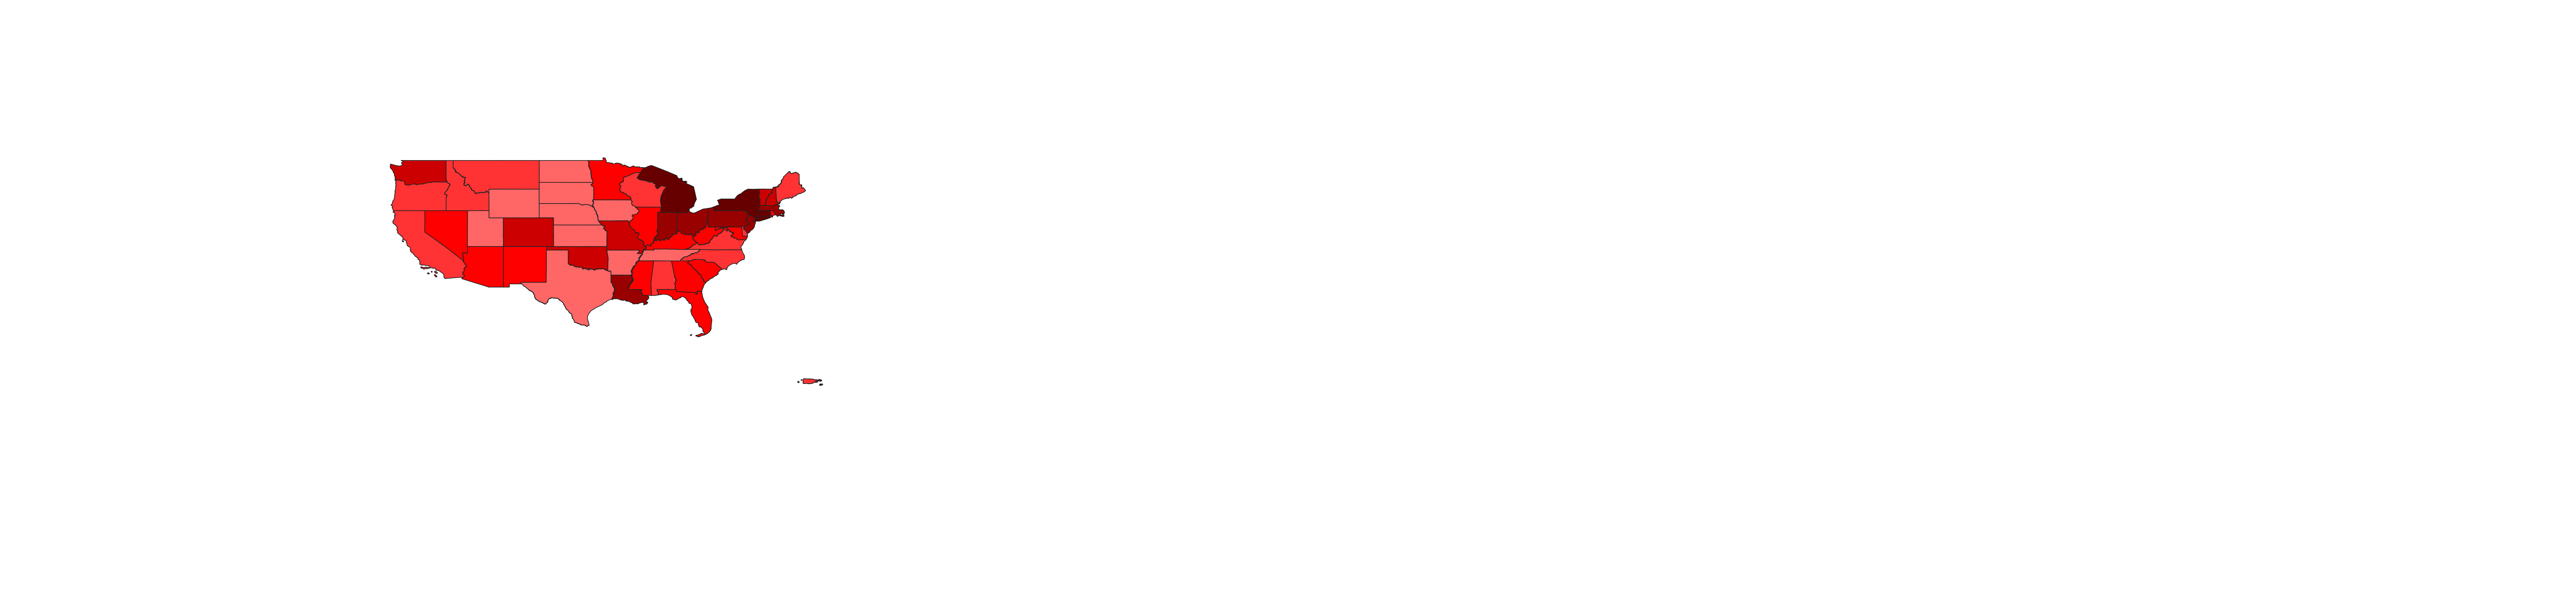

In [20]:
xt = death_layer.extent()
width  = 1024
height = int(width*xt.height()/xt.width())

manager = project.layoutManager()
layout = QgsPrintLayout(project)
layout.initializeDefaults()
manager.addLayout(layout)

pc = layout.pageCollection()
pc.page(0).attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))

map = QgsLayoutItemMap(layout)
map.setRect(1,1,1,1)
map.setLayers([death_layer])

options = QgsMapSettings()
options.setLayers([death_layer])
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
map.setExtent(xt)
map.setBackgroundColor(QColor(255, 255, 255))

layout.addLayoutItem(map)

map.attemptMove(QgsLayoutPoint(0,0,QgsUnitTypes.LayoutMillimeters))
map.attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))

legend = QgsLayoutItemLegend(layout)
legend.setTitle("Legenda:")
layerTree = QgsLayerTree()
layerTree.addLayer(death_layer)
legend.model().setRootGroup(layerTree)

legend.setRect(1,1,1,1)
legend.setScale(6)
legend.setReferencePoint(6)
legend.attemptMove(QgsLayoutPoint(0,320,QgsUnitTypes.LayoutMillimeters))
legend.setLinkedMap(map)
layout.addLayoutItem(legend)
legend.setLegendFilterByMapEnabled(True)
legend.refresh()

exporter = QgsLayoutExporter(layout)
image = exporter.renderPageToImage(0)

imgbuf= QBuffer()
imgbuf.open(QIODevice.ReadWrite)
image.save(imgbuf,"PNG")
Image(imgbuf.data())